In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Simulated price vs demand data
np.random.seed(42)
prices = np.linspace(5, 50, 20)
demand = 1000 - 15 * prices + np.random.normal(0, 50, len(prices))  # demand drops as price increases
revenue = prices * demand


In [3]:
# Create DataFrame
df = pd.DataFrame({'Price': prices, 'Demand': demand, 'Revenue': revenue})

In [4]:
# Train regression model to predict demand from price
X = df[['Price']]
y = df['Demand']
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [5]:
# Predict demand for a range of prices
price_range = np.linspace(5, 50, 100).reshape(-1, 1)
predicted_demand = model.predict(price_range)
predicted_revenue = price_range.flatten() * predicted_demand


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# Find optimal price (price with max predicted revenue)
optimal_index = np.argmax(predicted_revenue)
optimal_price = price_range.flatten()[optimal_index]
max_revenue = predicted_revenue[optimal_index]


In [7]:
# Display optimal result
print(f"Optimal Price: ${optimal_price:.2f}")
print(f"Expected Revenue at Optimal Price: ${max_revenue:.2f}")


Optimal Price: $30.45
Expected Revenue at Optimal Price: $16092.38


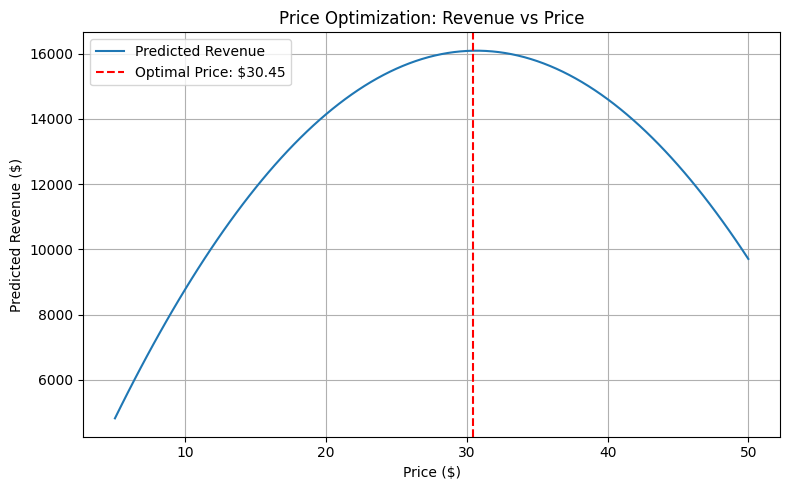

In [8]:
# Plot revenue vs price
plt.figure(figsize=(8, 5))
plt.plot(price_range, predicted_revenue, label='Predicted Revenue')
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
plt.title("Price Optimization: Revenue vs Price")
plt.xlabel("Price ($)")
plt.ylabel("Predicted Revenue ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()